## Danmarks Statistik
* Python eco-system: python interface for the API to Danmarks Statistik [API](https://www.dst.dk/da/Statistik/statistikbanken/api)

1 Installation
  * Clone or download PyDST from https://github.com/Kristianuruplarsen/PyDST
  * In the repro root run \>\> pip install -e .
We will cover a basic example

In [1]:
import PyDST
conn = PyDST.connection(language='da')
table = conn.get_tables('10409')

Getting all tables under topic code(s) {topics}


### Getting table info/content

In [2]:
table.info

,ID,Description,Variables,Unit,Last updated,First observation,Latest observation,Active
0,STATUS40,25 - 45 åriges videregående uddannelse,"[uddannelsesstatus, alder, køn, tid]",antal,2018-05-01T08:00:00,2005,2017,True
1,STATUS42,25-45 årige,"[status for videregående uddannelse, alder, fo...",antal,2018-05-01T08:00:00,2005,2017,True
2,STATUS44,25-45 årige,"[status for videregående uddannelse, alder, fo...",antal,2018-05-01T08:00:00,2005,2017,True
3,STATUS46,25-45 årige,"[status for videregående uddannelse, alder, fo...",antal,2018-05-01T08:00:00,2005,2017,True
4,STATUS54,25-45 årige,"[status for videregående uddannelse, alder, un...",antal,2018-05-01T08:00:00,2005,2017,True
5,STATUS50,25-45 årige,"[status for videregående uddannelse, alder, kø...",antal,2018-05-01T08:00:00,2005,2017,True


In [3]:
type(table.info)

pandas.core.frame.DataFrame

In [4]:
table.info.Variables.iloc[3]

['status for videregående uddannelse',
 'alder',
 'forældres beskæftigelsesstatus',
 'tid']

In [5]:
meta_data = conn.get_metadata('STATUS46')

Getting metadata for table STATUS46


In [6]:
meta_data.variables

['statusvid', 'alder', 'forbesk', 'tid']

In [7]:
resp = conn.get_data(table_id = 'STATUS46',
                     variables=meta_data.variables)
df = resp.df


            No values selected! Setting values to all ('*')
            
Getting table STATUS46, variables are ['statusvid', 'alder', 'forbesk', 'tid']
        values are {'statusvid': ['*'], 'alder': ['*'], 'forbesk': ['*'], 'tid': ['*']}


In [8]:
type(df)

pandas.core.frame.DataFrame

### Working with our data frame

In [9]:
df.columns.values

array(['STATUSVID', 'ALDER', 'FORBESK', 'TID', 'INDHOLD'], dtype=object)

In [10]:
df

,STATUSVID,ALDER,FORBESK,TID,INDHOLD
0,I ALT,I alt,I alt,2005,1606448
1,I ALT,I alt,I alt,2006,1592130
2,I ALT,I alt,I alt,2007,1581981
3,I ALT,I alt,I alt,2008,1571184
4,I ALT,I alt,I alt,2009,1551383
5,I ALT,I alt,I alt,2010,1534193
6,I ALT,I alt,I alt,2011,1514130
7,I ALT,I alt,I alt,2012,1494407
8,I ALT,I alt,I alt,2013,1487069
9,I ALT,I alt,I alt,2014,1490313


In [11]:
# Prepare data
year = 2017
df_pp = df.loc[df['TID']==year]
df_pp = df_pp.loc[df_pp['ALDER']=='I alt']
df_pp = df_pp.loc[df_pp['STATUSVID']!='I ALT']
df_pp = df_pp.loc[df_pp['FORBESK']!='I alt']
df_pp

,STATUSVID,ALDER,FORBESK,TID,INDHOLD
1455,FULDFØRT VIDEREGÅENDE UDDANNELSE,I alt,Begge forældre beskæftiget,2017,429458
1468,FULDFØRT VIDEREGÅENDE UDDANNELSE,I alt,En forælder beskæftiget,2017,85570
1481,FULDFØRT VIDEREGÅENDE UDDANNELSE,I alt,Ingen forælder beskæftiget,2017,20011
1494,FULDFØRT VIDEREGÅENDE UDDANNELSE,I alt,Uoplyst,2017,30640
2885,IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,I alt,Begge forældre beskæftiget,2017,36235
2898,IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,I alt,En forælder beskæftiget,2017,10867
2911,IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,I alt,Ingen forælder beskæftiget,2017,4337
2924,IGANGVÆRENDE VIDEREGÅENDE UDDANNELSE,I alt,Uoplyst,2017,11506
4315,INGEN VIDEREGÅENDE UDDANNELSE,I alt,Begge forældre beskæftiget,2017,399987
4328,INGEN VIDEREGÅENDE UDDANNELSE,I alt,En forælder beskæftiget,2017,155879


In [12]:
df_pp.to_csv('../data/dst_education_2017.csv')

## Adding visualization

In [13]:
import plotnine as pn

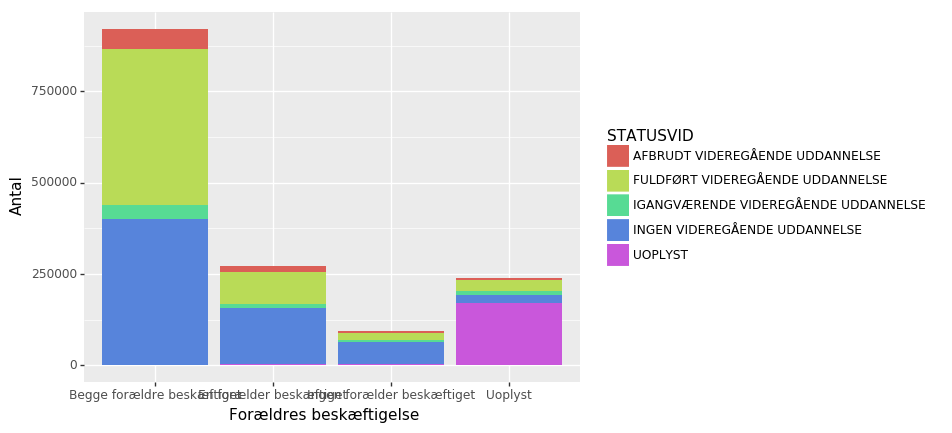

<ggplot: (-9223363269493575245)>

In [14]:
# Col plot stacked (text unreadible)
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col()
+ pn.labs(x='Forældres beskæftigelse', y='Antal')
)

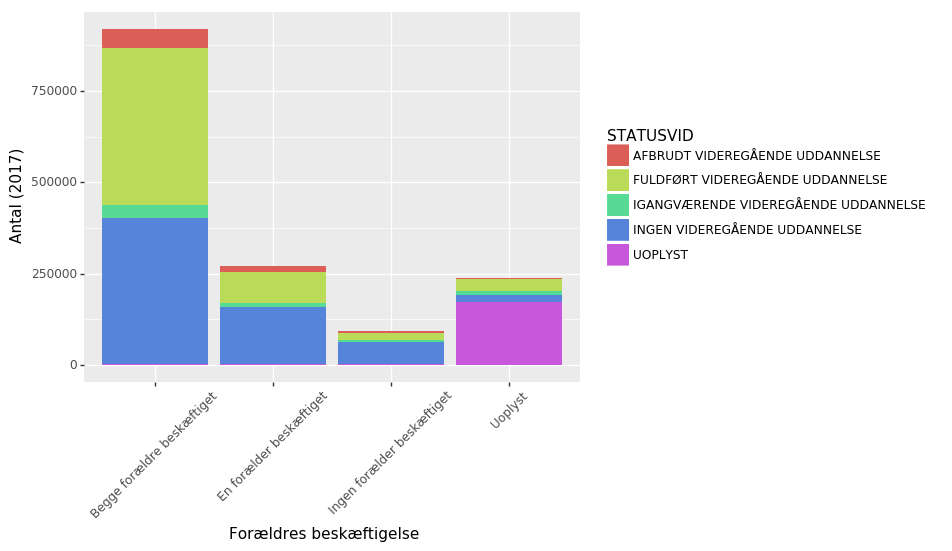

<ggplot: (-9223363269497847008)>

In [15]:
# Col plot stacked
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col()
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.theme(axis_text_x=pn.element_text(angle=45))
)

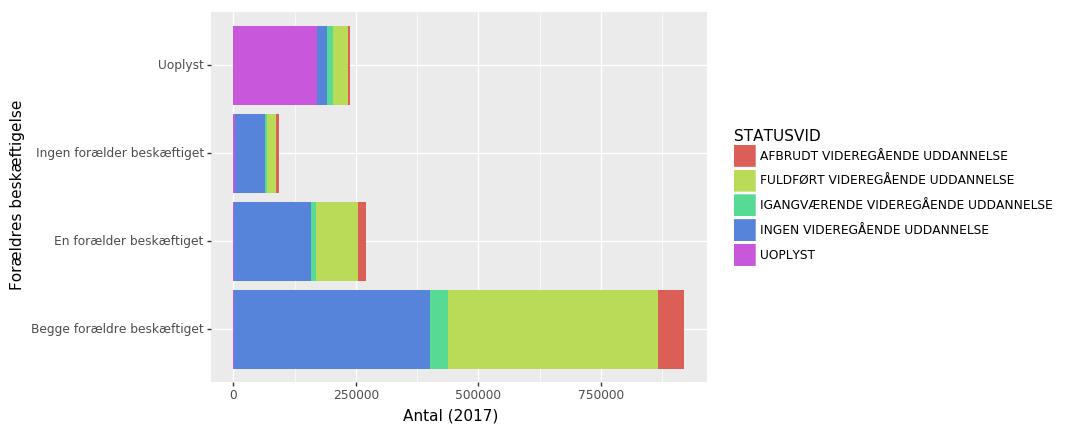

<ggplot: (8767356928916)>

In [16]:
# Flipping coordinates: avoiding titled text
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col()
+ pn.coords.coord_flip()
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
)

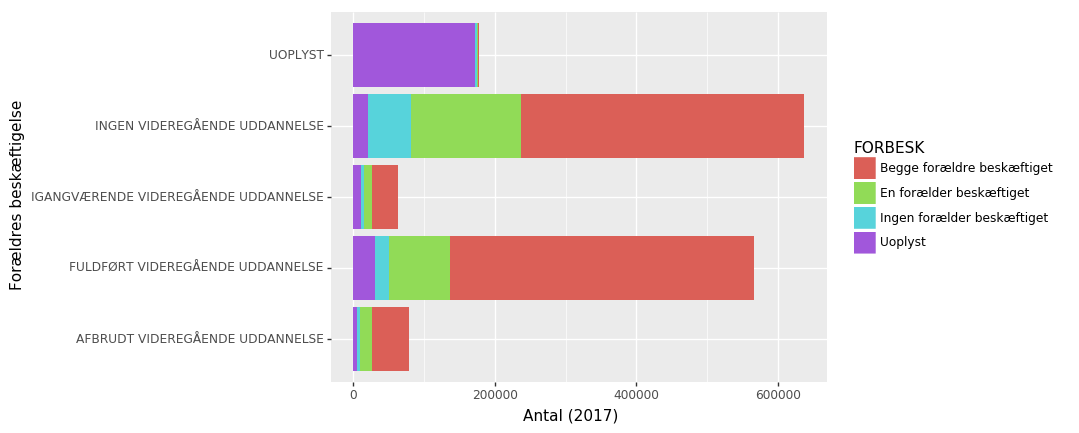

<ggplot: (-9223363269498094364)>

In [17]:
# Flipping factors
(pn.ggplot(df_pp)
+ pn.aes(x = 'STATUSVID', y='INDHOLD', fill='FORBESK')
+ pn.geom_col()
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.coords.coord_flip()
)

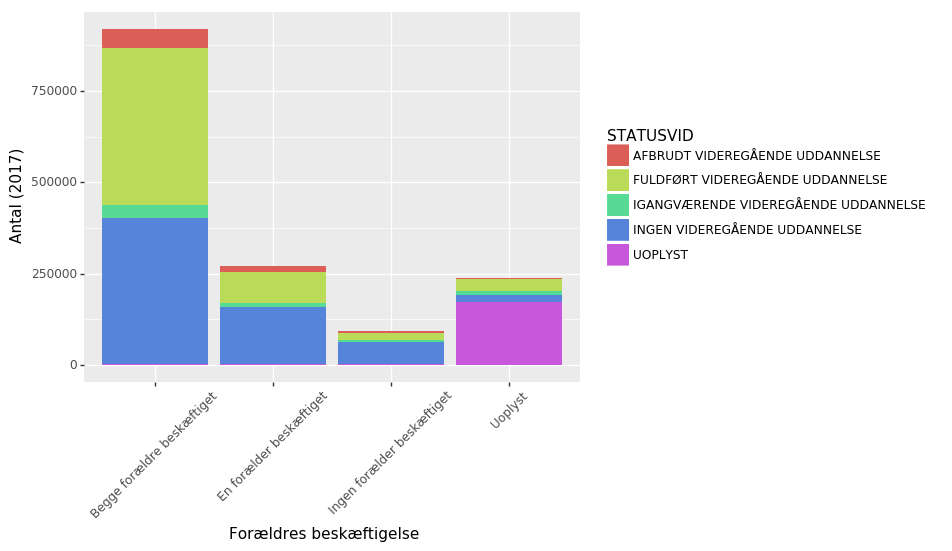

<ggplot: (8767356677517)>

In [18]:
# Bar plot stacked with no stat=identity
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_bar(stat='identity')
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.theme(axis_text_x=pn.element_text(angle=45))
)

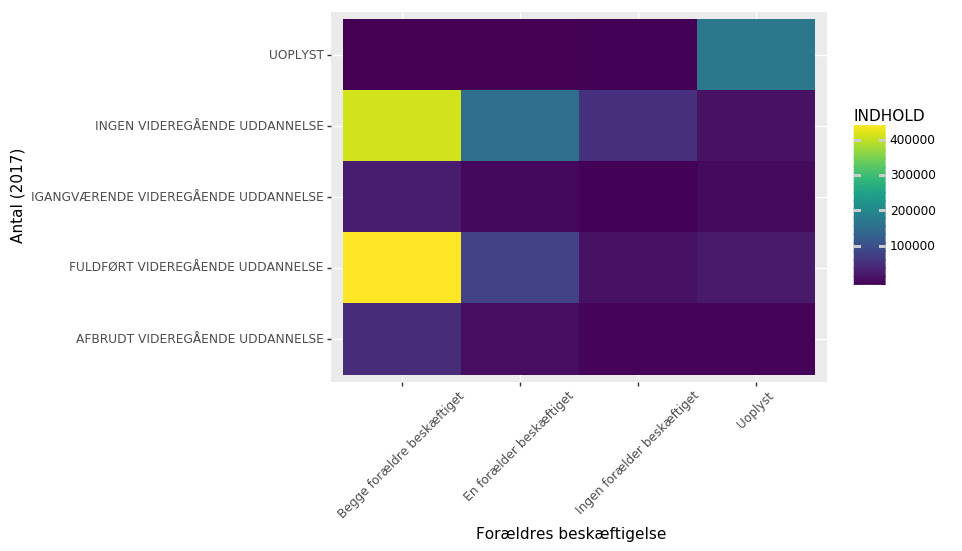

<ggplot: (-9223363269499927229)>

In [31]:
# Bar plot stacked with no stat=identity
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='STATUSVID', fill='INDHOLD')
+ pn.geom_tile()
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.theme(axis_text_x=pn.element_text(angle=45))
)

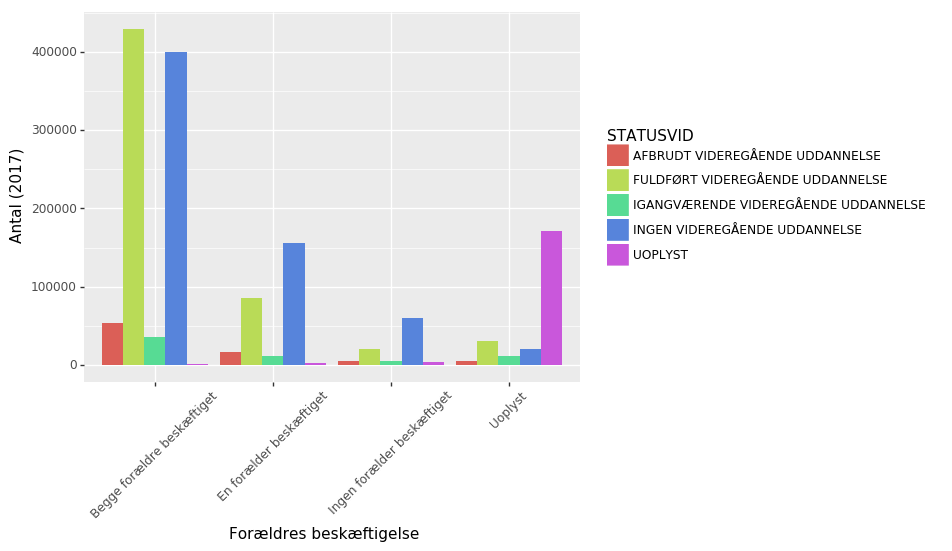

<ggplot: (8767354883462)>

In [20]:
#Bar plot grouped
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col(position='dodge')
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.theme(axis_text_x=pn.element_text(angle=45))
)

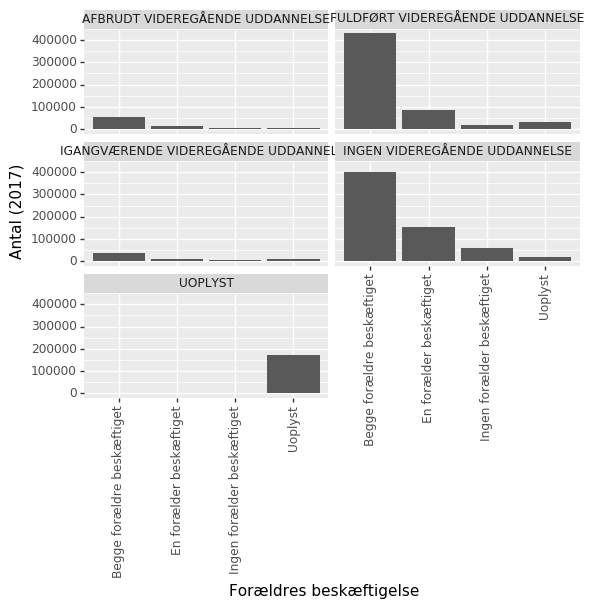

<ggplot: (8767354914203)>

In [21]:
# Avoiding colors and instead use faceting
#Bar plot grouped
(pn.ggplot(df_pp)
+ pn.aes(x = 'FORBESK', y='INDHOLD')
+ pn.geom_col(position='dodge')
+ pn.facet_wrap('STATUSVID', ncol=2)
+ pn.labs(x='Forældres beskæftigelse', y='Antal ({})'.format(year))
+ pn.theme(axis_text_x=pn.element_text(angle=90))
)

## As percentage within group

In [22]:
def percentage(x):
    x['INDHOLD'] = 100*x['INDHOLD']/x['INDHOLD'].sum() # mod indhold to contain the within-group percentage
    return x
df_ppp = df_pp.groupby('FORBESK').apply(percentage)

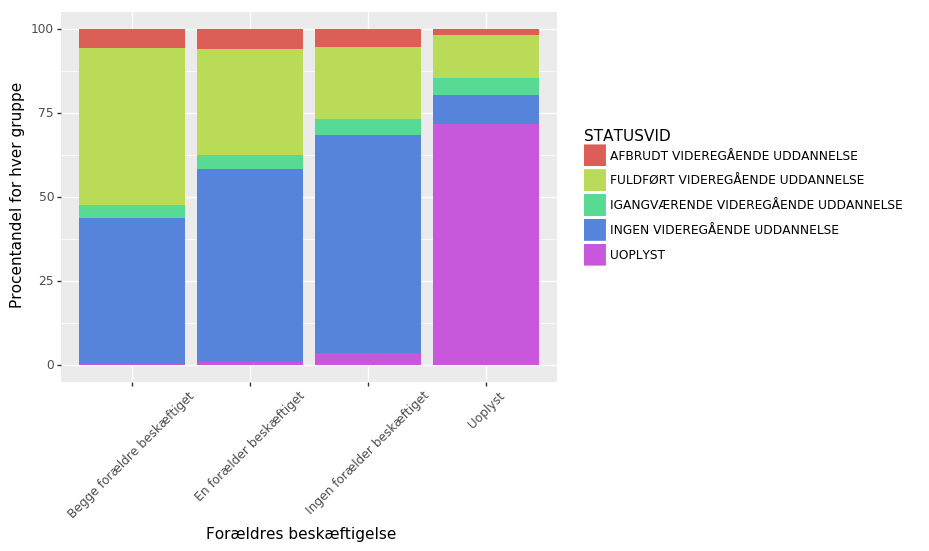

<ggplot: (8767354914266)>

In [23]:
(pn.ggplot(df_ppp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col()
+ pn.labs(x='Forældres beskæftigelse', y='Procentandel for hver gruppe')
+ pn.theme(axis_text_x=pn.element_text(angle=45))
)

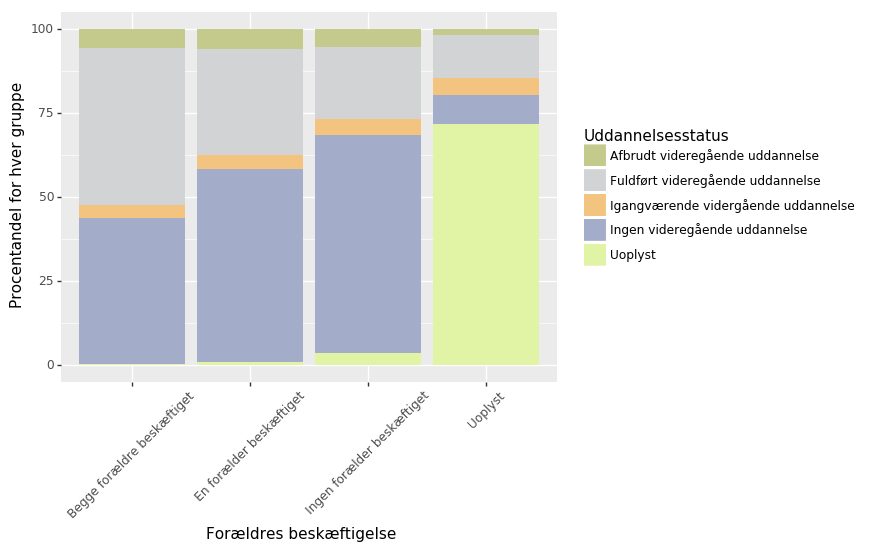

<ggplot: (-9223363269499899662)>

In [24]:
# Cleaning up text and manually select colors
(pn.ggplot(df_ppp)
+ pn.aes(x = 'FORBESK', y='INDHOLD', fill='STATUSVID')
+ pn.geom_col()
+ pn.labs(x='Forældres beskæftigelse', y='Procentandel for hver gruppe')
+ pn.theme(axis_text_x=pn.element_text(angle=45))
+ pn.scale_fill_manual(name = 'Uddannelsesstatus',
                       labels = ["Afbrudt videregående uddannelse", "Fuldført videregående uddannelse", "Igangværende vidergående uddannelse", "Ingen videregående uddannelse", 'Uoplyst'],
                       values=['#c3ca8c','#d1d3d4','#f2c480','#a3acc8','#e1f3a4'])
)

## Mini-assignment
* Go to https://www.dst.dk/ -> find an interesting area
* Goto ->Tabeller i Statistikbanken and copy the table string, e.g. the last part of http://www.statistikbanken.dk/10091
* Get table, meta data, and data
* Preprocess data
* Select data for visualization; select geom; visualize ....

## References
     
Kristian Larsen, PyDST - A python script for accessing the API of Statistics Denmark, [link](https://kristianuruplarsen.github.io/PyDST/)
Danmarks Statistik, Statistikbank API - Beta, [link](https://www.dst.dk/da/Statistik/statistikbanken/api)